In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image

In [2]:
img = np.load('./data/number.npy', allow_pickle=True)

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [4]:
gray_img = rgb2gray(img)

In [5]:
def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).mean(-1).mean(1)

In [6]:
img1 = rebin(gray_img, (8,8))/255*16

In [7]:
img1

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

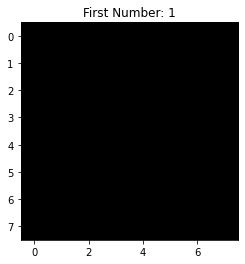

In [8]:
plt.imshow(img1,  cmap='gray')
plt.title(f'First Number: 1')
plt.show()

In [9]:
matplotlib.image.imsave('test.png',img1)

# TODO: 
* Save Image
* Directly Label Image
* store more information like given by sklearn data

In [210]:
def init_dataset():
    data = dict()
    loaded_img = plt.imread("./data/img/img_20211023-132410_2.png")
    loaded_img_gray = rgb2gray(loaded_img)
    loaded_img_transformed= rebin(loaded_img_gray, (8,8))*16
    data['label'] = [2]
    data['images'] = [loaded_img_transformed]
    np.save("./data/dataset.npy", data)

    

In [211]:
def load_dataset(path: str):
    data = np.load(path, allow_pickle=True)
    loaded_data = dict()
    for key, key_d in data.item().items():
        loaded_data[key] = key_d
    return loaded_data

In [224]:
def append_dataset(label: int, img: np.ndarray):
    loaded_data = load_dataset("./data/dataset.npy")
    labels = loaded_data['label']
    images =  loaded_data['images']
    
    labels.append(label)
    images.append(img)

    loaded_data['label'] = labels
    loaded_data['images']=images
    np.save("./data/dataset.npy", loaded_data)

In [225]:
def load_example_image():
    loaded_img = plt.imread("./data/img/img_20211023-132410_2.png")
    loaded_img_gray = rgb2gray(loaded_img)
    loaded_img_transformed= rebin(loaded_img_gray, (8,8))*16
    return loaded_img_transformed

In [235]:
init_dataset()

In [227]:
np.load("./data/dataset.npy", allow_pickle=True)

array({'label': [2], 'images': [array([[ 1.91341185,  1.91341185,  1.91341185,  1.91341185,  1.91341185,
         1.91341185,  1.91341185,  1.91341185],
       [ 1.91341185,  6.03996873, 12.37082365, 12.05421192,  4.54676104,
         1.91341185,  1.91341185,  1.91341185],
       [ 1.91341185,  3.25684713,  3.03692558,  7.91504341,  6.47987486,
         1.91341185,  1.91341185,  1.91341185],
       [ 1.91341185,  1.91341185,  4.20611779, 12.41995306,  2.97418048,
         1.91341185,  1.91341185,  1.91341185],
       [ 1.91341185,  1.91341185,  9.71444724,  6.05803931,  1.91341185,
         1.91341185,  1.91341185,  1.91341185],
       [ 1.91341185,  3.33766288, 13.51203144, 12.25449425, 11.37593745,
         6.47987486,  1.91341185,  1.91341185],
       [ 1.91341185,  1.91341185,  1.91341185,  2.97418048,  3.74443933,
         2.58547459,  1.91341185,  1.91341185],
       [ 1.91341185,  1.91341185,  1.91341185,  1.91341185,  1.91341185,
         1.91341185,  1.91341185,  1.91341185]])

In [228]:
data = load_dataset("./data/dataset.npy")

In [229]:
loaded_img = load_example_image()
append_dataset(2, loaded_img)

In [238]:
data = load_dataset("./data/dataset.npy")

In [239]:
# show appended data
data

{'label': [2, '4'],
 'images': [array([[ 1.91341185,  1.91341185,  1.91341185,  1.91341185,  1.91341185,
           1.91341185,  1.91341185,  1.91341185],
         [ 1.91341185,  6.03996873, 12.37082365, 12.05421192,  4.54676104,
           1.91341185,  1.91341185,  1.91341185],
         [ 1.91341185,  3.25684713,  3.03692558,  7.91504341,  6.47987486,
           1.91341185,  1.91341185,  1.91341185],
         [ 1.91341185,  1.91341185,  4.20611779, 12.41995306,  2.97418048,
           1.91341185,  1.91341185,  1.91341185],
         [ 1.91341185,  1.91341185,  9.71444724,  6.05803931,  1.91341185,
           1.91341185,  1.91341185,  1.91341185],
         [ 1.91341185,  3.33766288, 13.51203144, 12.25449425, 11.37593745,
           6.47987486,  1.91341185,  1.91341185],
         [ 1.91341185,  1.91341185,  1.91341185,  2.97418048,  3.74443933,
           2.58547459,  1.91341185,  1.91341185],
         [ 1.91341185,  1.91341185,  1.91341185,  1.91341185,  1.91341185,
           1.9134118